# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict medical appointment no-shows. 
<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>R Programming</li>
    <li>Data Cleaning</li>
    <li>Descriptive Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Machine Learning</li>
    <li>Decision Trees</li>
</details><br>
Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 
<img src="https://i.stack.imgur.com/zlAi2.png" style="float: left; width: 32%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="http://cran.uvigo.es/Rlogo.svg" style="float: left; width: 25%; margin-bottom: 0.5em;">
<img src="https://www.displayr.com/wp-content/uploads/2018/09/Untitled-design-10.png" style="float: left; width: 31%; margin-left: 5%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you work on the administrative staff for a small, family medicine clinic. Recently, business has been tough. The clinic is struggling to remain financially viable. The providers are already working at capacity and are unable to see any more patients. While the clinic staff is small, they're a dedicated group. They discover that identifying and minimizing no-show appointments would increase revenue without increasing each provider's census. Can analytics and machine learning help predict no-shows and keep this clinic open?

Continue through the case to find out. 

### Why do we care about no-shows?

A patient no-show is defined as a missed patient appointmen where the patient was scheduled, but did not appear for their medical appointment, and made no prior contact with the clinical staff. 
Medical appointment no shows are a serious issue across all type of medical practices, specialties, locations, and medical practice models. This is an endemic issue that is estimated to cost the healthcare industry $150 billion annually. 

<p align="center">
  <img width="400" height="200" src="https://www.carecloud.com/continuum/wp-content/uploads/2011/05/patient-no-show-cost-400x201.jpg">
</p>

It's estimated that for every appointment no show: 
- Primary care physcians lose close to 150 - 200 USD in revenue
- Surgeons lose close to 500 USD in revenue
- Patient who no-show are more likely to require expensive emergency care down the road. This increases healthcare cost for everyone. 

Already the healthcare industry is attempting to decrease no-shows through leveraging technology and innovative practice methods. However, this is still an endemic problem. Any algorithm which could reliably predict no-shows could improves costs and outcomes.

## Using Jupyter Notebook 

To run any of the code, select the code cell on the **bottom right (1.2)**, and click the `Run` button on the toolbar above. Try it out on the example code cell below on the **bottom right (1.2)**.

**The** `Run` **Button**
<img src="https://i.imgur.com/jr4dpLW.png" style="width:300px;height:150px;">

In [1]:
# This is an example of a code cell
cat('Congratulations! \n')
cat('You\'ve run your first code cell.\n')


Congratulations! 
You've run your first code cell.


### Jupyter Notebook Background

What is a Jupyter Notebook? Why is it so special? Below is a definition of Jupyter Notebook from the creators. 

> "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." - [jupyter.org](https://www.jupyter.org)

Through integrating code, text, and multimedia, jupyter notebooks allow us to create a digital notebook that is both **interactive** and **informative**. Don't just take my word for it though, personally explore how Jupyter Notebook can augment your learning through the case!
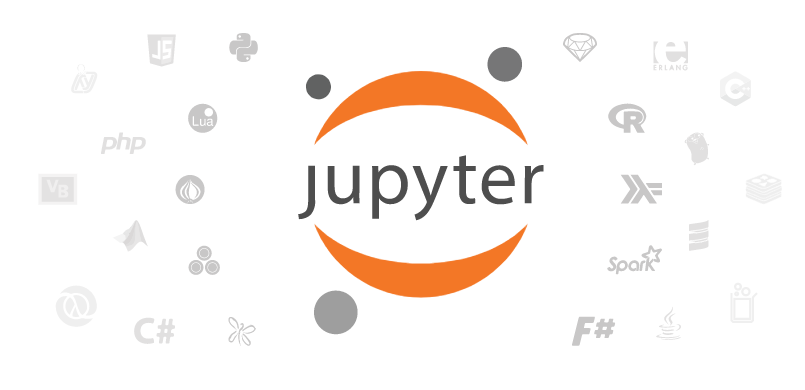


### Case Code Tips

Within code cells you will see green text preceded by a `#` symbol. These are comments and will help explain what portions of the code are doing. All code should be ready to run as shown. 

Some code may require more time to run. On the left hand side you will notice the label: `In [ ]:`. If there is an `*` in between the `[]`'s after you select `Run`, that indicates that your code is in the process of running. Like so: `In [*]:`

## Meeting Our Data



We'll be using a deidentified set of patient data made available on [kaggle](https://www.kaggle.com/joniarroba/noshowappointment). Kaggle is an online data science and machine learning community. 

<img src="https://miro.medium.com/max/1200/0*ftOal7fKVCNtJr4N.png" style="float: center; width: 65%">

Through our case we will be evaluating a dataset of patients who either showed or no showed to their medical appointment. It also includes several characteristics of each patients such as age, gender, and several comorbidities. 

### Necessary Data Files

<p style="text-align: center;">med_no_show.csv</p>

***
This file contains data for a little over 110,000 medical appointments and 14 variables. 

The dataset will already be downloaded for the case. The original data can be accessed [here](https://www.kaggle.com/joniarroba/noshowappointments)

## Consulting the Data Dictionary

There are several variables or labels which you might not understand. There are many reasons for this. You might lack domain experience for the data you're analyzing. The data creators might also have used arbitrary labels only they understood (this is considered a bad practice).

The way to combat this is consulting the data dictionary or documentation. These are table or documents which describe the data in detail. Have a variable you don't understand? Check the documentation! Don't understand what an output for a variable means? Check the documentation!

### Medical Appointment No Show Data Dictionary

A data dictionary is provided on the [kaggle page](https://www.kaggle.com/joniarroba/noshowappointments) where the data is hosted. The data dictionary has also been reproduced below for your convenience. However, you may notice some of the data dictionary labels are not in Portuguese instead of English. Below is an English recreation of the data dictionary with edited grammar and context for ease of reading in English.

<center>

| *Variable*        | *Definition*                                                            |
| ----------------- | ----------------------------------------------------------------------- |
| PatientId         | Identification of a patient                                             |
| AppointmentID     | Identification of each appointment                                      |
| Gender            | Male or Female                                                          | 
| ScheduledDay      | The day of the actual appointment, when they have to visit the doctor   |
| AppointmentDay    | The day someone called or registered the appointment                    |
| Age               | How old is the patient                                                  |
| Neighbourhood     | Where the appointment takes place                                       |
| Scholarship       | True or False, are they enrolled in Bolsa Familia low-income subsidy program [More Info](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)                                 |
| Hypertension      | True or False, if patient has hypertension                              |
| Diabetes          | True or False, if the patient has diabetes                              |
| Alcoholism        | True or False, if the patient has alcoholism                            |
| Handicap          | # of handicaps a person has                                             |
| SMS-received      | True or False, one or more SMS message sent to the patient              |      
| No.show           | True or False, patient did not show to their medical appointment        |

</center>

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [2]:
# Increase max number of columns displayed in output tables
options(repr.matrix.max.cols = 2000)
cat('Setup complete!')
# Calling external libraries for additional functionality
suppressMessages(library(tidyverse))
suppressMessages(library(randomForest))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(caret))
suppressMessages(library(e1071))
suppressMessages(library(pROC))
suppressMessages(library(rpart))
suppressMessages(library(rpart.plot))

set.seed(10) # Seeding so we obtain the same outcome when we randomly sample

Setup complete!

# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that is commonly overlooked within data science projects. This is critical for making our data convenient to interpret and manipulate. In addition, many analytic techniques require properly formatted data. Finally, healthcare datasets may have have data that isn't clinically relevant (ie. raw lab values). Processing can convert these variables into clinically meaningful information. It won't matter how sophisticated our analysis is if we don't properly process our data. A common saying in data science is "Junk in, Junk out". 

## Reading Our data

We'll being by reading in our data so we can clean and use it. 

In [3]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
cat('Data loading, please wait\n')
no_show_data <- read.csv(file="data/med_no_show.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

## Inspecting our Data

Now lets get an overview of our data

In [4]:
head(no_show_data)
str(no_show_data)

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


'data.frame':	110527 obs. of  14 variables:
 $ PatientId     : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ AppointmentID : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ Gender        : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 1 1 1 1 ...
 $ ScheduledDay  : Factor w/ 103549 levels "2015-11-10T07:13:56Z",..: 27742 27504 27539 27709 27498 20074 21386 21496 24945 20895 ...
 $ AppointmentDay: Factor w/ 27 levels "2016-04-29T00:00:00Z",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Age           : int  62 56 62 8 56 76 23 39 21 19 ...
 $ Neighbourhood : Factor w/ 81 levels "AEROPORTO","ANDORINHAS",..: 40 40 47 55 40 59 26 26 2 13 ...
 $ Scholarship   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hipertension  : int  1 0 0 0 1 1 0 0 0 0 ...
 $ Diabetes      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show       : Factor w/ 2 lev

You'll immediately notice some of the results are in a foreign language or in an unfriendly format. This data is derived from deidentified Brazilian patients. We'll need to make this data formatted correctly, easily interpretable, and easily understood by an English audience. We have our work cut out for us but it will be worth it when we analyze the data!

## Recoding Variables

We now need to recode our variables into meaningful outputs. Lets give our variable names easily understood labels. 

In [5]:
# Renaming Variables
names(no_show_data)[names(no_show_data) == 'PatientId'] <- 'patient_id'
names(no_show_data)[names(no_show_data) == 'AppointmentID'] <- 'appointment_id'
names(no_show_data)[names(no_show_data) ==  'Gender'] <- 'gender'
names(no_show_data)[names(no_show_data) == 'ScheduledDay'] <- 'scheduled_day'
names(no_show_data)[names(no_show_data) == 'AppointmentDay'] <- 'appointment_day'
names(no_show_data)[names(no_show_data) == 'Age'] <- 'age'
names(no_show_data)[names(no_show_data) == 'Neighbourhood'] <- 'neighborhood'
names(no_show_data)[names(no_show_data) == 'Scholarship'] <- 'enroll_subsidy'
names(no_show_data)[names(no_show_data) == 'Hipertension'] <- 'hypertension'
names(no_show_data)[names(no_show_data) == 'Diabetes'] <- 'diabetes'
names(no_show_data)[names(no_show_data) == 'Alcoholism'] <- 'alcoholism'
names(no_show_data)[names(no_show_data) == 'Handcap'] <- 'handicap'
names(no_show_data)[names(no_show_data) == 'SMS_received'] <- 'sms_received'
names(no_show_data)[names(no_show_data) == 'No.show'] <- 'no_show'

cat('Variables renamed.')

Variables renamed.

We now need to recode many of our variables into meaningful outputs. For instance, we will code the variable `hypertension`. If `hypertension` has a value of `1` then we code the variable as `Has hypertension`. If `hypertension` has a value of `0` then we code the variable as `No hypertension`. 

In [6]:
# Recoding Variables
# Convert to character so can be recoded
no_show_data$enroll_subsidy <- as.character(no_show_data$enroll_subsidy)
no_show_data$enroll_subsidy[no_show_data$enroll_subsidy == '1'] <- 'Enrolled'
no_show_data$enroll_subsidy[no_show_data$enroll_subsidy == '0'] <- 'Not enrolled'
no_show_data$enroll_subsidy <- as.factor(no_show_data$enroll_subsidy)

no_show_data$hypertension <- as.character(no_show_data$hypertension)
no_show_data$hypertension[no_show_data$hypertension == '1'] <- 'Has hypertension'
no_show_data$hypertension[no_show_data$hypertension == '0'] <- 'No hypertension'
no_show_data$hypertension <- as.factor(no_show_data$hypertension)

no_show_data$diabetes <- as.character(no_show_data$diabetes)
no_show_data$diabetes[no_show_data$diabetes == '1'] <- 'Has diabetes'
no_show_data$diabetes[no_show_data$diabetes == '0'] <- 'No diabetes'
no_show_data$diabetes <- as.factor(no_show_data$diabetes)

no_show_data$sms_received <- as.character(no_show_data$sms_received)
no_show_data$sms_received[no_show_data$sms_received == '1'] <- 'Yes'
no_show_data$sms_received[no_show_data$sms_received == '0'] <- 'No'
no_show_data$sms_received <- as.factor(no_show_data$sms_received)

cat('Variables recoded')

Variables recoded

Let confirm our changes

In [7]:
head(no_show_data[c('enroll_subsidy', 'hypertension', 'diabetes', 'sms_received')])
str(no_show_data[c('enroll_subsidy', 'hypertension', 'diabetes', 'sms_received')])

enroll_subsidy,hypertension,diabetes,sms_received
Not enrolled,Has hypertension,No diabetes,No
Not enrolled,No hypertension,No diabetes,No
Not enrolled,No hypertension,No diabetes,No
Not enrolled,No hypertension,No diabetes,No
Not enrolled,Has hypertension,Has diabetes,No
Not enrolled,Has hypertension,No diabetes,No


'data.frame':	110527 obs. of  4 variables:
 $ enroll_subsidy: Factor w/ 2 levels "Enrolled","Not enrolled": 2 2 2 2 2 2 2 2 2 2 ...
 $ hypertension  : Factor w/ 2 levels "Has hypertension",..: 1 2 2 2 1 1 2 2 2 2 ...
 $ diabetes      : Factor w/ 2 levels "Has diabetes",..: 2 2 2 2 1 2 2 2 2 2 ...
 $ sms_received  : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


It look like our changes were successful. We now need to correctly categorize our data as either numeric or categorical. 

**Pre-Check:** What is the difference between a numeric and categorical variable?

- **Numeric:** variables whose values are whole numbers (ie. numbers, percents)
- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

> Note R calls categorical variables **Factors**

In [8]:
no_show_data$enroll_subsidy <- as.factor(no_show_data$enroll_subsidy)
no_show_data$hypertension <- as.factor(no_show_data$hypertension)
no_show_data$diabetes <- as.factor(no_show_data$diabetes)
no_show_data$alcoholism <- as.factor(no_show_data$alcoholism)
no_show_data$handicap <- as.factor(no_show_data$handicap)
no_show_data$sms_received <- as.factor(no_show_data$sms_received)

cat('Conversion complete!')

Conversion complete!

### Dealing with Date and Time Data

In [9]:
head(no_show_data[c('scheduled_day', 'appointment_day')])

scheduled_day,appointment_day
2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
2016-04-27T08:36:51Z,2016-04-29T00:00:00Z


We also need to make sure the dates are converted into the correct variable type. They have `T` and `Z` characters spread out throughout the entry. Lets get rid of these.

In [10]:
no_show_data$scheduled_day <- str_replace(no_show_data$scheduled_day,"T"," ")
no_show_data$scheduled_day <- str_replace(no_show_data$scheduled_day,"Z","")
no_show_data$appointment_day <- str_replace(no_show_data$appointment_day,"T"," ")
no_show_data$appointment_day <- str_replace(no_show_data$appointment_day,"Z","")

cat('Character removed')

Character removed

In [11]:
head(no_show_data[c('scheduled_day', 'appointment_day')])

scheduled_day,appointment_day
2016-04-29 18:38:08,2016-04-29 00:00:00
2016-04-29 16:08:27,2016-04-29 00:00:00
2016-04-29 16:19:04,2016-04-29 00:00:00
2016-04-29 17:29:31,2016-04-29 00:00:00
2016-04-29 16:07:23,2016-04-29 00:00:00
2016-04-27 08:36:51,2016-04-29 00:00:00


Now lets convert these variables into the correct format. We will be converting these variables into a variable type called date time variables. 

In [12]:
# Coversion to datetime, note tz specifies time zone
no_show_data$scheduled_day <- as.POSIXct(no_show_data$scheduled_day, tz = 'UTC')
no_show_data$appointment_day <- as.POSIXct(no_show_data$appointment_day, tz = 'UTC')

cat('Conversion completed')

Conversion completed

## Checking for Missing Values

Let's determine the number of missing for each variable

In [13]:
# Determine number of missing for each variable
cat('Number of Missing Data for Each Variable:')
sapply(no_show_data, function(x) sum(is.na(x)))

Number of Missing Data for Each Variable:

patient_id  appointment_id          gender   scheduled_day appointment_day 
              0               0               0               0               0 
            age    neighborhood  enroll_subsidy    hypertension        diabetes 
              0               0               0               0               0 
     alcoholism        handicap    sms_received         no_show 
              0               0               0               0

No missing data! This will rarely happen. It's more likely there are erroneous values that our program is not picking up as errors. 

In [14]:
summary(no_show_data[,-c(1,2)])

 gender    scheduled_day                 appointment_day              
 F:71840   Min.   :2015-11-10 07:13:56   Min.   :2016-04-29 00:00:00  
 M:38687   1st Qu.:2016-04-29 10:27:01   1st Qu.:2016-05-09 00:00:00  
           Median :2016-05-10 12:13:17   Median :2016-05-18 00:00:00  
           Mean   :2016-05-09 07:49:15   Mean   :2016-05-19 00:57:50  
           3rd Qu.:2016-05-20 11:18:37   3rd Qu.:2016-05-31 00:00:00  
           Max.   :2016-06-08 20:07:23   Max.   :2016-06-08 00:00:00  
                                                                      
      age                  neighborhood        enroll_subsidy 
 Min.   : -1.00   JARDIM CAMBURI : 7717   Enrolled    :10861  
 1st Qu.: 18.00   MARIA ORTIZ    : 5805   Not enrolled:99666  
 Median : 37.00   RESISTÊNCIA    : 4431                       
 Mean   : 37.09   JARDIM DA PENHA: 3877                       
 3rd Qu.: 55.00   ITARARÉ        : 3514                       
 Max.   :115.00   CENTRO         : 3334               

For instance, in `age` we can see someone that is -1 years old and 115 years old. These are highly unlikely values. Lets remove implausible values. We will then classify these implausible values in a format our program can recognize. Based on observation, we can make these initial judgements:

**Age:**
- It's physiologically implausible for an individual to be -1 years old and highly unlikely for an individuals to be 115 years old. This is likely an input error. 

Lets examine `age` more closely

In [15]:
cat('Age:')
quantile(no_show_data$age, c(0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1), 
         na.rm = TRUE)

Age:

0%   1%   5%  10%  25%  50%  75%  90%  95%  99% 100% 
  -1    0    1    5   18   37   55   68   75   86  115

Once again, ages below 0 are impossible and ages above 100 are unlikely given the trends in our data. Lets remove these values. 

In [16]:
no_show_data$age[no_show_data$age < 0 | no_show_data$age > 100] <- NA

cat('Data edited')

Data edited

Lets confirm

In [17]:
cat('Number of Missing Data for Each Variable:')
sapply(no_show_data, function(x) sum(is.na(x)))

Number of Missing Data for Each Variable:

patient_id  appointment_id          gender   scheduled_day appointment_day 
              0               0               0               0               0 
            age    neighborhood  enroll_subsidy    hypertension        diabetes 
              8               0               0               0               0 
     alcoholism        handicap    sms_received         no_show 
              0               0               0               0

Better although it looks like we still have unusually clean data. Not a bad problem to have!

## Creating Day of Week

Thanks to our time data, we can extract some useful information. We have both the scheduled time and the appointment time. The appointment time would be more useful since we are looking for appointment day no-shows. We can use our time variable to determine the day of the week the appointment occurred. 

In [18]:
no_show_data$appt_day_of_week <- weekdays(no_show_data$appointment_day)
no_show_data$appt_day_of_week <- as.factor(no_show_data$appt_day_of_week)

cat('Variable appt_day_of_week created')

Variable appt_day_of_week created

Many times you can use your given data to extract even more useful data. Be on the lookout for these opportunities. The more **relevant** data you can extract, the better. 

# Exploratory Analysis

Now that we've cleaned our data we can begin exploring our data. Using this, we can see which features are good candidates for building our prediction model. Feature selection  will determine how good or how bad your model is. Bad feature selection can have a hugely negative impact on your model even if you used the most advanced techniques. Understanding the clinical nuances of your data can inform better feature selection

### Why Can't We Just Use More Variables?

One issue you might be wondering about is why do we even need to select variables. Why not just use all of the variables? After all, more data lead to better models right? This is a common misconception that even experience analysts need to watch out for. Including too many features in your prediction model can lead to what is known as 'overfitting'. Overfitting is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, its where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. 

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

The boxplot divides data into division known as quartiles. The first quartile (Q1) corresponds to the 25th percentile of the data. The second quartile (Q2) corresponds to the 50th percentile of the data. This is also the median. The third quartile (Q3) corresponds to the 75 percentile of the data. The lines on the box represent Q1, the median, and Q3. The tails or 'whiskers' of the plots represent 1.5 * IQR above and below the Q1 and Q3. 

<img src="https://miro.medium.com/max/1200/1*2c21SkzJMf3frPXPAR_gZA.png" align="center" style="width: 70%; margin-bottom: 0.5em; margin-top: 0.5em;">

## Getting a Closer Look at our Data

Lets take a closer look as we begin our exploratory data analysis. 

In [19]:
str(no_show_data)

'data.frame':	110527 obs. of  15 variables:
 $ patient_id      : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ appointment_id  : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ gender          : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 1 1 1 1 ...
 $ scheduled_day   : POSIXct, format: "2016-04-29 18:38:08" "2016-04-29 16:08:27" ...
 $ appointment_day : POSIXct, format: "2016-04-29" "2016-04-29" ...
 $ age             : int  62 56 62 8 56 76 23 39 21 19 ...
 $ neighborhood    : Factor w/ 81 levels "AEROPORTO","ANDORINHAS",..: 40 40 47 55 40 59 26 26 2 13 ...
 $ enroll_subsidy  : Factor w/ 2 levels "Enrolled","Not enrolled": 2 2 2 2 2 2 2 2 2 2 ...
 $ hypertension    : Factor w/ 2 levels "Has hypertension",..: 1 2 2 2 1 1 2 2 2 2 ...
 $ diabetes        : Factor w/ 2 levels "Has diabetes",..: 2 2 2 2 1 2 2 2 2 2 ...
 $ alcoholism      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ handicap        : Factor w/ 5 levels "0","1",

In [20]:
summary(no_show_data[,-2])

   patient_id        gender    scheduled_day                
 Min.   :3.922e+04   F:71840   Min.   :2015-11-10 07:13:56  
 1st Qu.:4.173e+12   M:38687   1st Qu.:2016-04-29 10:27:01  
 Median :3.173e+13             Median :2016-05-10 12:13:17  
 Mean   :1.475e+14             Mean   :2016-05-09 07:49:15  
 3rd Qu.:9.439e+13             3rd Qu.:2016-05-20 11:18:37  
 Max.   :1.000e+15             Max.   :2016-06-08 20:07:23  
                                                            
 appointment_day                    age                  neighborhood  
 Min.   :2016-04-29 00:00:00   Min.   :  0.00   JARDIM CAMBURI : 7717  
 1st Qu.:2016-05-09 00:00:00   1st Qu.: 18.00   MARIA ORTIZ    : 5805  
 Median :2016-05-18 00:00:00   Median : 37.00   RESISTÊNCIA    : 4431  
 Mean   :2016-05-19 00:57:50   Mean   : 37.08   JARDIM DA PENHA: 3877  
 3rd Qu.:2016-05-31 00:00:00   3rd Qu.: 55.00   ITARARÉ        : 3514  
 Max.   :2016-06-08 00:00:00   Max.   :100.00   CENTRO         : 3334  
        

This summary page presents us with quite a bit of data. The first thing to realize is that the output will differ based on whether the variable is numeric or categorical. Numeric outputs will include summary statistics while categorical variables will include frequency counts of each category. 

These summaries will provide a useful reference throughout our exploratory data analysis. 

## Assessing Numeric Variables

We can see that our only numeric variable is `age`. Lets examine its distribution.  

Warning message:
"Removed 8 rows containing non-finite values (stat_bin)."

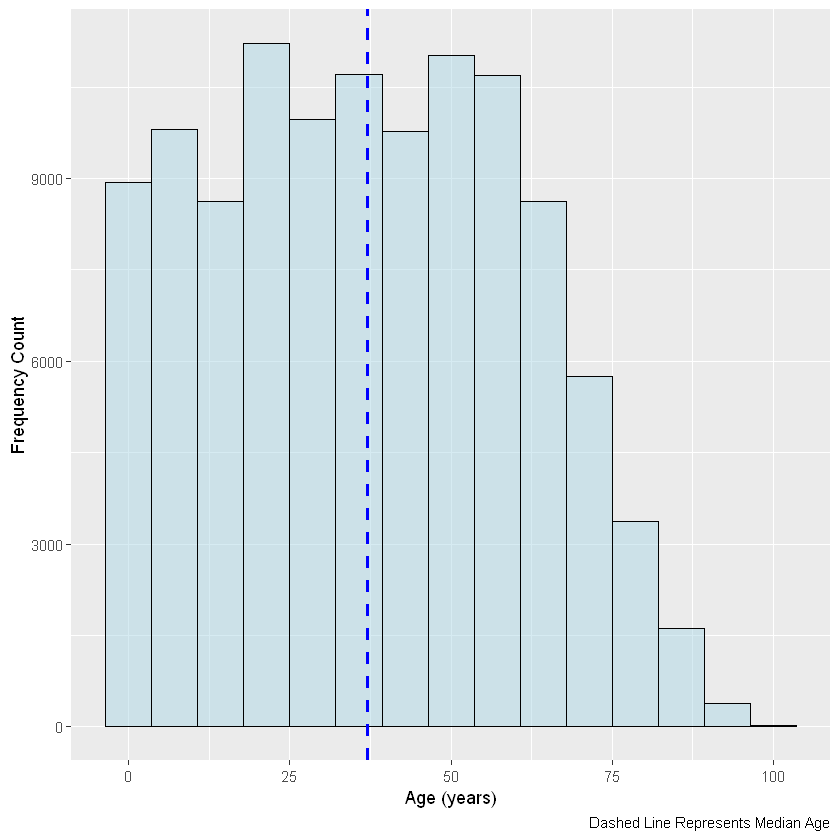

In [21]:
### Age ###
# Create Plot
age_plot <- ggplot(no_show_data, aes(x=age)) +
geom_histogram(alpha = 0.5, position = 'identity', bins=15, color ='black ', fill='light blue') +
labs(x='Age (years)', y='Frequency Count', caption = 'Dashed Line Represents Median Age')

# Display + Median Line
age_plot + geom_vline(aes(xintercept=median(age, na.rm=TRUE)),
            color="blue", linetype="dashed", size=1)

Now lets see if theres a relationship between `age` and `no_show`

Warning message:
"Removed 8 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 8 rows containing non-finite values (stat_summary)."

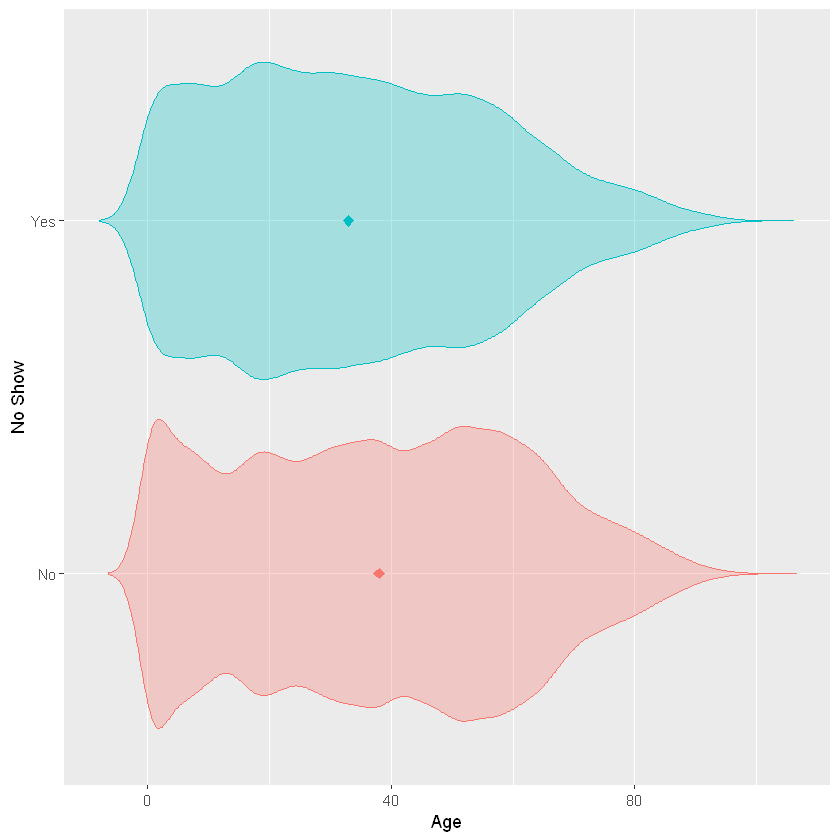

In [22]:
ggplot(no_show_data, aes(x=no_show, y=age, color = no_show, fill = no_show)) + 
geom_violin(alpha = 0.3, trim = FALSE) + # By default tails are trimmed
stat_summary(fun.y=median, geom="point", shape = 23, size = 2) +
theme(legend.position='none') +
labs(y='Age', x='No Show') +
coord_flip()

This is difficult. The distribution shape and median seems similar, but there appear to be nuanced differences. It's difficult to tell whether there is a significant difference in showing up to appointments by age group. We can gain further clarity by performing a t-test

In [23]:
no_show_new <- subset(no_show_data, no_show == 'No')
show_new <- subset(no_show_data, no_show == 'Yes')

t.test(no_show_new$age, show_new$age, var.equal = FALSE)


	Welch Two Sample t-test

data:  no_show_new$age and show_new$age
t = 20.89, df = 36156, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.153921 3.807034
sample estimates:
mean of x mean of y 
 37.78730  34.30682 


Based on our t.test results we can see that is looks like age between whether an individual showed to their appointments are not the same (p < 0.05). For this reason we will be keeping this as a variable for building our prediction model. 

### What is a t-test

A t-test is a type of test to assess if there is a statistically significant difference between the means of two groups. It requires that both variables being test are numeric variables. In our case, we were examining the mean age of the group that showed up to their appointments against the group that did not show up. The test worked because age is a numeric variable. 

## Assessing Categorical Variables

Finally lets look at our remaining variables. The rest of the variable of interest are categorical. We should be able to observe their effect on stroke well and quickly using stacked bar plots. 

In [24]:
str(no_show_data)

'data.frame':	110527 obs. of  15 variables:
 $ patient_id      : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ appointment_id  : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ gender          : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 1 1 1 1 ...
 $ scheduled_day   : POSIXct, format: "2016-04-29 18:38:08" "2016-04-29 16:08:27" ...
 $ appointment_day : POSIXct, format: "2016-04-29" "2016-04-29" ...
 $ age             : int  62 56 62 8 56 76 23 39 21 19 ...
 $ neighborhood    : Factor w/ 81 levels "AEROPORTO","ANDORINHAS",..: 40 40 47 55 40 59 26 26 2 13 ...
 $ enroll_subsidy  : Factor w/ 2 levels "Enrolled","Not enrolled": 2 2 2 2 2 2 2 2 2 2 ...
 $ hypertension    : Factor w/ 2 levels "Has hypertension",..: 1 2 2 2 1 1 2 2 2 2 ...
 $ diabetes        : Factor w/ 2 levels "Has diabetes",..: 2 2 2 2 1 2 2 2 2 2 ...
 $ alcoholism      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ handicap        : Factor w/ 5 levels "0","1",

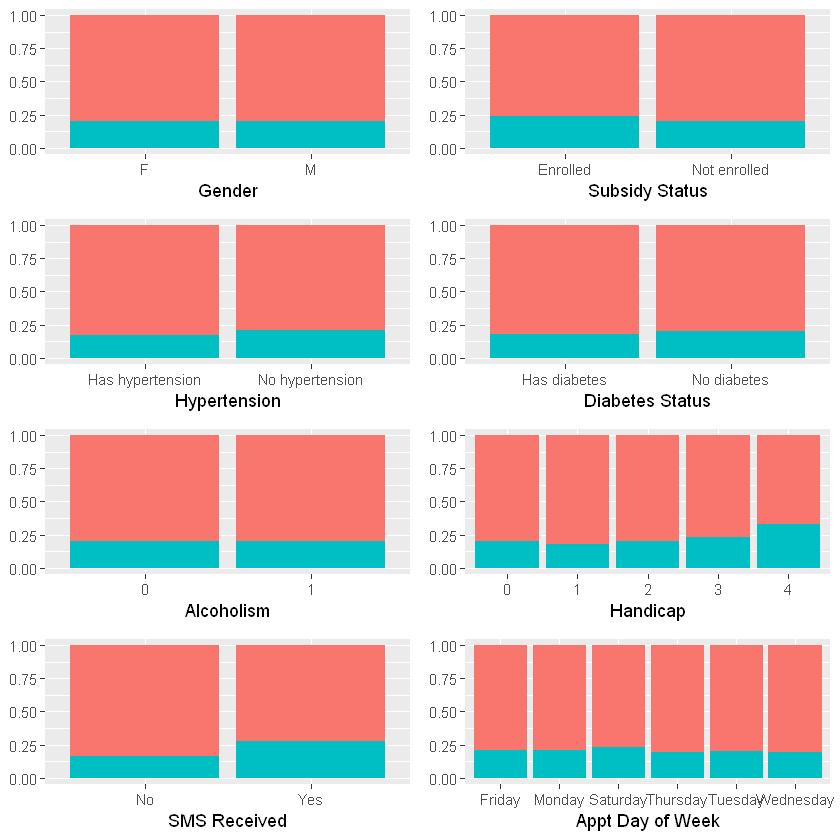

In [25]:
p1 <- ggplot(no_show_data, aes(x=gender, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Gender', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p2 <- ggplot(no_show_data, aes(x=enroll_subsidy, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Subsidy Status', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p3 <- ggplot(no_show_data, aes(x=hypertension, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Hypertension', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p4 <- ggplot(no_show_data, aes(x=diabetes, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Diabetes Status', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p5 <- ggplot(no_show_data, aes(x=alcoholism, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Alcoholism', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p6 <- ggplot(no_show_data, aes(x=handicap, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Handicap', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p7 <- ggplot(no_show_data, aes(x=sms_received, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='SMS Received', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p8 <- ggplot(no_show_data, aes(x=appt_day_of_week, fill = no_show)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Appt Day of Week', fill = "No Show Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

# Arrange plots into grid
plot_grid(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)


In [26]:
str(no_show_data)

'data.frame':	110527 obs. of  15 variables:
 $ patient_id      : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ appointment_id  : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ gender          : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 1 1 1 1 ...
 $ scheduled_day   : POSIXct, format: "2016-04-29 18:38:08" "2016-04-29 16:08:27" ...
 $ appointment_day : POSIXct, format: "2016-04-29" "2016-04-29" ...
 $ age             : int  62 56 62 8 56 76 23 39 21 19 ...
 $ neighborhood    : Factor w/ 81 levels "AEROPORTO","ANDORINHAS",..: 40 40 47 55 40 59 26 26 2 13 ...
 $ enroll_subsidy  : Factor w/ 2 levels "Enrolled","Not enrolled": 2 2 2 2 2 2 2 2 2 2 ...
 $ hypertension    : Factor w/ 2 levels "Has hypertension",..: 1 2 2 2 1 1 2 2 2 2 ...
 $ diabetes        : Factor w/ 2 levels "Has diabetes",..: 2 2 2 2 1 2 2 2 2 2 ...
 $ alcoholism      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ handicap        : Factor w/ 5 levels "0","1",

We can see based on our visualizations that the variables `age`, `neighborhood`, `enroll_subsidy`, `handicap`, `sms_received`, and `appt_day_of_week` have an effect on no show status. This is indicates they would be good variables to include in our prediction model. 

One variable we have not look at yet is the `neighborhood` variable. Since there are 81 different neighborhoods included in our data, it would not be practical to visualize this variable using a stacked bar plot similar to how we did for our other variables. However, we can use an chi-squared test to see whether this variable has an effect on no show status. 

In [27]:
chisq.test(no_show_data$no_show, no_show_data$neighborhood)

Warning message in chisq.test(no_show_data$no_show, no_show_data$neighborhood):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  no_show_data$no_show and no_show_data$neighborhood
X-squared = 491.93, df = 80, p-value < 2.2e-16


Based on our results we can see that the number of no shows differs significantly based upon neighborhood. 

### What is a Chi-squared Test

A chi-square test is a statistical test that tells you whether groups of observations are different. For instance, say you're researching two companies and you divide them either as male or female. The number of males compared to females in the two companies differ but how can you tell that this is not random chance? A chi-squared test can be used to differentiate whether the **observed** number of males and females in your study differs from the **expected** number of males and females. 

> Note: Chi-square tests can only be used for categorical variables. There are separate tests to determine whether numerical numbers differ form one another. These additional tests are beyond the scope of the case. 

## Analyzing Our Data: Logistic Regression 

Now that our variables have been successfully converted and our outcome has been defined, we can analyze our data. Logistic regression is a mathematical model that estimates the probability of a binary outcomes (such as our risk label). It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our primary outcome? What information will a logistic regression model tell use about our outcome?

Our primary outcome is whether a individual did or did not show to their appointment. The logistic regression model will allow us to see how individuals variables affect whether an individual has a has a no show **while controlling for other variables in the model**. For instance, we can see whether being older affects having a no show while controlling for handicaps, neighborhood, etc...

Very useful indeed!

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Lets say our logistic regression model finds that weight has a statistically significant effect on being high risk or low risk asthmatic patient. This means that it more likely that there is indeed a relationship between weight and risk than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is less than 5% chance that the observed relationship in the data was due to chance alone. The image below display a sample R output.

<img src="https://drchrispook.files.wordpress.com/2017/02/anova-output-from-r1.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

We can now create our logistic model. 

In [ ]:
# Creating a logistic regression model
mylogit <- glm(no_show ~ age + neighborhood + enroll_subsidy + handicap + sms_received + appt_day_of_week, 
               data = no_show_data, family = "binomial")
mylogit.sum <- summary(mylogit)
mylogit.sum

We can see that several of our variables do not have a statistically significant effect. Several of these variables are clinically relevant. However, many of these variables had an observable effect on no show status. In addition, some of the variable that are not statistically significant such as `neighborhood` and `handicap` are variables which can have large effect on health access. For these reasons, we will be keeping these variables in our model. 

While statistical significance is important, it is always more important to consider whether our predictor are clinically relevant for the outcome we will be predicting. Remember to alway consider the clinical significance of a variable and not just the statistical significance!

# Building A Predictive Model

## Building a Prediction Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analyses. What is Machine Learning?

In machine learning, data is split into a training and test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the asthmatic patient is high- or low- risk). The models predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

For our case we will be using a model called a decision tree. Decision trees are charts which help make a decision or prediction. Each branch represents a possible outcome. The end of branches represent an end result or decision. Decision trees are common in medical settings. For instance, below is an algorithm for evaluating febrile seizures. This is an example of a decision tree. 

<img src="https://img.grepmed.com/uploads/1105/febrileseizure-management-algorithm-diagnosis-complex-original.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

We now need to split our data into training and test data. We will be splitting our data into 80% training data and 20% test data. 

In [ ]:
# Splitting the data into training and test set data
# Setting the seed value so we get the same result when we repreat
set.seed(123)

# Determining which rows willbe in the traiing data
training_index <- sample(nrow(no_show_data), 0.8*nrow(no_show_data), replace = FALSE)  

# Create Training Set
training_data <- no_show_data[training_index,]

# Create Test Set
test_data <- no_show_data[-training_index,]

Now that we've created our training and test data, we need to build our machine learning model. 

In [ ]:
model <- (no_show ~ age + enroll_subsidy + neighborhood + handicap + sms_received + appt_day_of_week)

# Train Decision Tree
caseweights <- ifelse(training_data$no_show == 'Yes', 4, 1)
train_decision_tree <- rpart(model, data=training_data, method = 'class',
                             control = rpart.control(minsplit=20, minbucket=1, cp = 0.005), 
                             weights = caseweights)

# Plot Decision Tree
rpart.plot(train_decision_tree)

Now lets see how our model performed. 

In [ ]:
# Make prediction
test_decision_tree <- predict(train_decision_tree, test_data[,-14], type = 'class')
# Display Confusion Matrix
confusionMatrix(test_decision_tree, test_data$no_show, positive = 'Yes')

Our model was able to correctly predict 61% of the time with a sensitivity of 52% and a specificity of 64%. 

One question you may be wondering is does our model perform well enough? That depends. That depends on the type of condition or prediction we're making. That depends on whether alternative predictive models or tools exist and how our new model compares. Additional research or consideration should always be done consider whether a model's result is not only statistically significant, but **clinically significant**. 

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy: <a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;(TP&space;&plus;&space;TN)/Total" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;(TP&space;&plus;&space;TN)/Total" title="\large (TP + TN)/Total" style="margin-bottom: 0.5em; margin-top: 0.5em;"/></a>
Accuracy allows us to measure how often our model predicted correctly. The second metric is sensitivity:<a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;TP&space;/&space;(TP&space;&plus;&space;FN)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;TP&space;/&space;(TP&space;&plus;&space;FN)" title="\large TP / (TP + FN)" style="margin-bottom: 0.5em; margin-top: 0.5em;"/></a>
Sensitivity asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually high-risk) how often will the model predict positively (ie. how often will the model then predict the patient to be high-risk). The final metric is specificity:<a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;FP&space;/&space;(FP&space;&plus;&space;TN)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;FP&space;/&space;(FP&space;&plus;&space;TN)" title="\large FP / (FP + TN)" style="margin-bottom: 0.5em; margin-top: 0.5em;"/></a>
Specificity asks the question, that when the outcome is actually negative (ie. in our case when our patient is actually low-risk) how often will the model predict negatively (ie. how often will the model then predict the patient to be low-risk). 




## Evaluating our Model

We will be evaluating our model using a receiver operating curve (ROC) and the area under the curve (AUC) value. 

> If you're unsure what a ROC or AUC value is, please consult section 5.1.1 ('Understanding ROC Curves and AUC Values')

In [ ]:
ROC <- roc(response = test_data$no_show, predictor = factor(test_decision_tree, 
                                                           ordered = TRUE, 
                                                           levels = c('No', 'Yes')))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

In [ ]:
# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2))

The closer to the top left corner our ROC curve is the better. The higher our AUC value is the better. These metrics provide useful measures when tuning our model. They are also better overall measures than accuracy alone. We can compare different models using these two metrics. 

### Understanding ROC Curves and AUC Values

An ROC plots sensitivity (probability of predicting a real psoitive will be positive) against 1-specificity (the probability of predicting a real negative will be a positive). A model with a 50-50 change of making a correct decision will have a ROC curve which is just a diagonal line. A model with a curve that hugs the top left corner is a perfect model. The area under a curve is a measure of magnitude of the ROC curve. The closer the ROC curve is to the top left corner, the higher the AUC value is. The higher the AUC value is, the better. 

<img src="https://miro.medium.com/max/406/1*pk05QGzoWhCgRiiFbz-oKQ.png" style="float: center; width: 34%; margin-bottom: 0.5em;">

## Machine Learning Explainability

An important part of any model is being able to explain it. We will be measuring the variable importance for our model. The higher the variable importance, the more important that variable is for our model for predicting no shows.

In [ ]:
df <- data.frame(train_decision_tree$variable.importance)
df2 <- df %>% 
  tibble::rownames_to_column() %>% 
  dplyr::rename("variable" = rowname) %>% 
  dplyr::arrange(train_decision_tree$variable.importance) %>%
  dplyr::mutate(variable = forcats::fct_inorder(variable))
ggplot2::ggplot(df2) +
  geom_col(aes(x = reorder(variable, train_decision_tree$variable.importance), y = train_decision_tree$variable.importance),
           col = "black", show.legend = F) +
  coord_flip() +
  scale_fill_grey() +
  theme_bw()

From our results above, we can see that handicap is by far the most important variable. This indicates that further research among this population could yield interesting insights. In addition, this could indicate that this would be a good group to target to reduce no shows. Finally, we can see that the next most important variable was the appointment day of the week. This also indicates that the day of the week has an impact and any future work to reduce no show appointment could take into account the day of the week. 

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There much more to learn and much more you can explore in this field!